## PYTORCH MODEL WORKFLOW - Introduction

#### What we will cover?

**1. Data Preparation** <br>
**2. Build Model (Loss & Optimization)**<br>
**3. Fit the Model**<br>
**4. Making Predictions and Evaluating Model (Inference)**<br>
**5. Saving and Loading Model**<br>
**6. Itegration**<br>

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
print(f"Current PyTorch version for this Environment:\t{torch.__version__}")

Current PyTorch version for this Environment:	2.5.1


#### Creating a Device-agnostic Code
This means if we've got access to a GPU, our code will use the GPU (for potentially faster computing).<br>
If a GPU is not available, the code will default using CPU.

In [3]:
"""Device Agnostic Coding for running on preferred Device"""
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Active Device: {device}")

Active Device: cuda


### Machine Learning Essentials:

1. Data needed in numerical representation
2. Model to learn patterns in that numerical representation of data

We will start with a simple **Linear Regression** model formula. Which we know as: `Y = wX + b` , where `Y` is the dependent variable, `X` is the explanatory variable, `w` is the slope **(weight)**, and `b` is the y-intercept **(bias)** of the straight line.<br> So let's start with defining these parameters.

In [4]:
# Define the parameters
weight = 0.6
bias = 0.4

# Create some numbers
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y =  weight * X + bias

print(f"Input Tensor:\t{X[:10]},\n\n Output Tensor:\t {y[:10]}")

Input Tensor:	tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]),

 Output Tensor:	 tensor([[0.4000],
        [0.4120],
        [0.4240],
        [0.4360],
        [0.4480],
        [0.4600],
        [0.4720],
        [0.4840],
        [0.4960],
        [0.5080]])


In [5]:
print(f"Length of X: {len(X)}\nLength of y: {len(y)}")

Length of X: 50
Length of y: 50


In [6]:
# Splitting Data into Train & Test sets
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

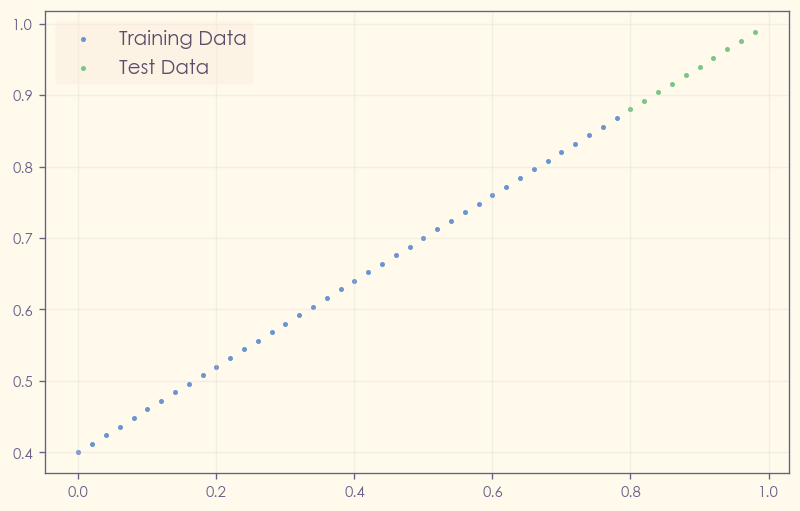

In [7]:
# Visualizing the data
def plot_pred(train_data=X_train.cpu(), # cpu() to explicitly move data to device='cpu'
             train_labels=y_train.cpu(),
             test_data=X_test.cpu(),
             test_labels=y_test.cpu(),
             predictions=None):
    
    """Plots training data, test data and compare predictons"""
    # Plot the data
    plt.figure(figsize=(8,5))
    plt.scatter(train_data, train_labels, s=4, label="Training Data")
    plt.scatter(test_data, test_labels, s=4, label="Test Data")
    
    # Plot Predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, s=4, label="Predictions")
    plt.legend(prop={"size": 12});
    
plot_pred()

### Let's build the Model with PyTorch
**What our model will do?**
* Start with random parameters (weight & bias)
* Adjust the random parameters to better represent the ideal ground truth values

**How does the model Adjust?**
* *Gradient Descent*
* *Backpropagation*

In [8]:
# nn contains all of PyTorch's building blocks for Neural networks
from torch import nn

class LinearRegressionModel(nn.Module): # nn.Module is the building bricks of PyTorch
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    # Define FORWARD method to do computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # returns LR formula

### PyTorch model building Essentials
* `torch.nn` --> Contains all of the buildings for computational graphs or, Neural Network
* `torch.nn.Module` --> The base class of all Neural Network modules.
    * |--> `forward()` method could be overwriten by subclassing the nn module. It requires overwriting the forward computation of the model
* `torch.nn.Parameter` --> Defining the parameters hat our model will use to learn.
* `torch.optim` --> To define the optimizer for better gradient descent

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the module
model_0 = LinearRegressionModel()

# Checkout the params
state_dict = model_0.state_dict()

# Extract the tensor values
tensor_values = list(state_dict.values())

c, d = tensor_values

a = float(f"{c[0]:.4f}")
b = float(f"{d[0]:.4f}")

In [10]:
# List the named params
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
print(f"The params value we currently have in our tensor is   : ({c[0]:.4f}, {d[0]:.4f})")
print(f"The params value we need to adjust using our model is : ({weight:.4f}, {bias:.4f})")

The params value we currently have in our tensor is   : (0.3367, 0.1288)
The params value we need to adjust using our model is : (0.6000, 0.4000)


#### Making predictions using `torch.inference_mode()`
To check the model's predictive efficiency by considering how well it predict `y_test` based on `X_test`.
When the data are being passed onto the model, it runs through the `forward()` method.

In [12]:
print(f"These are our input data:\n{X_test}\n\nAnd we want our model to adjust the values to these:\n {y_test}")

These are our input data:
tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

And we want our model to adjust the values to these:
 tensor([[0.8800],
        [0.8920],
        [0.9040],
        [0.9160],
        [0.9280],
        [0.9400],
        [0.9520],
        [0.9640],
        [0.9760],
        [0.9880]])


Using the `torch.inference_mode()` method in predicting model gives us the predictions without any saved gradients. In prediction, we do not need the gradients as we do not update the backwardprop while doing predictions. So this mode disables the useful things needed in training and show us only the prediction.

In [13]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
"""
Similar things can be done with `no_grad()`
with torch.no_grad():
    y_preds = model_0(X_test)
"""
print(f"These are predicted:\n{y_preds}\n\nDesired ground Truth:\n {y_test}")

These are predicted:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Desired ground Truth:
 tensor([[0.8800],
        [0.8920],
        [0.9040],
        [0.9160],
        [0.9280],
        [0.9400],
        [0.9520],
        [0.9640],
        [0.9760],
        [0.9880]])


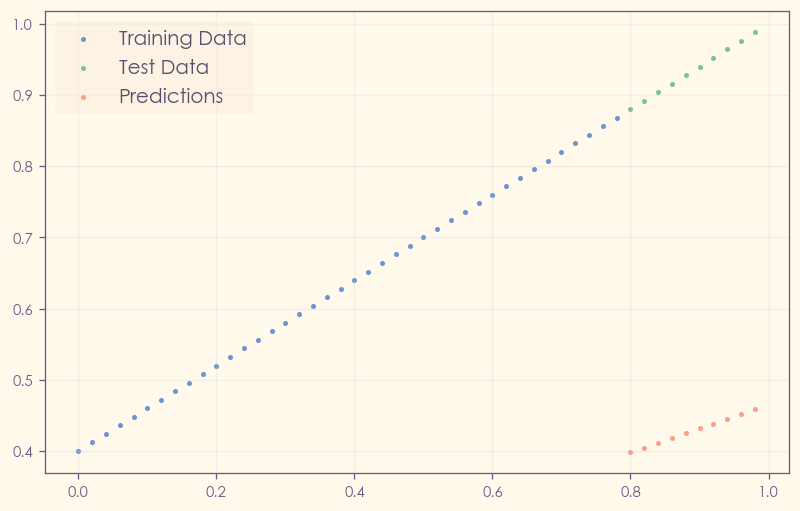

In [14]:
# Let's Visualize the predictions
plot_pred(predictions=y_preds)

## Train the model
The intuition of training a model is to adjust the *unknown* (random) parameters to some *known* (ideal) parameters. In other words, model training is a **better representation of the data from a poor representation**.
##### How to measure poorness between the test data and predicted data? 
* **Loss Function :** A function to measure the wrongness of model's performance on predicting the ideal output. The lower is better!
* **Optimizer :** Given the loss of the model, it adjusts the model's parameters (e.g., weight & bias) to improve loss function.
    * Optimizer will mainly use two important parameters:
        * `params` = Parameters: The model's initial params that will be optimized
        * `lr` = Learning Rate: A hyperparameter that defines the changing step for the parameters.

##### What are the main parts of building a Model?
* **Training Loop :** It will be adjusting the *initial parameters* of the model as it goes through an *iterative process* of prediction and improvment of the loss function towards the ideal output.
* **Testing Loop :** It will be checking the *adjusted parameters* of the model as it goes through an *iterative process* of evaluation and inference of the predicted output in the training loop.

In [15]:
"""
We are going to use the `L1 Loss` or the Mean Absolute Error (MAE)
and the `SGD Optimizer` or the Stochastic Gradient Descent for this model.
"""
# Setup a Loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01) # learning_rate: Hyperparameter

#### Building the Training & Testing loop
Essentials for a training loop:
1. Loop through the data.
2. Forward pass (by overwriting the `forward()` method.
3. Loss calculation (by comparing forward pass predictions with ground truth labels).
4. Loss backward - Move backwards through the graph to calculate the gradients of each of the params of our model with respect to the loss (**backpropagation**).
5. Optimization - Using optimizer to adjust the params to improve the loss (**gradient descent**).

In [16]:
torch.manual_seed(42)

"""0. Loop through the data"""
#Epoch is loops through data
epochs = 121

# Track values to compare and evaluate
epoch_count = []
train_loss_values = []
test_loss_values = []

# Now move our data as well as the Model to the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
# Move the model to the target device to move the parameters within
model_0 = model_0.to(device)

# Passing the data through the model for a number of epochs (e.g. 100)
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()
    
    """1. Forward Pass"""
    # Forward pass the train data using forward() method
    y_pred = model_0(X_train)
    
    """2. Loss Calculation"""
    # Calculate Loss between predicted and ground truth
    loss = loss_fn(y_pred, y_train) # (y_pred, y_true)
    #print(f"Epoch {epoch} \t| Loss:\t{loss:.6f}   |")
    
    """3. Optimizer Zero Grad : This actually works with 4 & 5"""
    # Reset the previous gradients for next iteration
    optimizer.zero_grad()
    
    """4. Backpropagation"""
    # Perform backprop on the loss
    loss.backward()
    
    """5. Gradient Descent"""
    # Progress the optimizer
    optimizer.step()
    
    
    """ TESTING LOOP"""
    # This turns off unnecessary settings OFF for evaluation
    model_0.eval()
    
    # This turns off gradient tracking
    with torch.inference_mode():
        """1. Do the forward pass"""
        test_pred = model_0(X_test)
        
        """2. Calculate the loss"""
        test_loss = loss_fn(test_pred, y_test)
        
    """Print what's happening"""
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.item())
        test_loss_values.append(test_loss.item())
        print(f"| Epoch: {epoch:03d}  | Train Loss: {loss:.6f} | Test Loss: {test_loss:.6f} |")

| Epoch: 000  | Train Loss: 0.373881 | Test Loss: 0.492065 |
| Epoch: 010  | Train Loss: 0.258671 | Test Loss: 0.357355 |
| Epoch: 020  | Train Loss: 0.143461 | Test Loss: 0.222645 |
| Epoch: 030  | Train Loss: 0.038487 | Test Loss: 0.097416 |
| Epoch: 040  | Train Loss: 0.023864 | Test Loss: 0.057605 |
| Epoch: 050  | Train Loss: 0.020319 | Test Loss: 0.046594 |
| Epoch: 060  | Train Loss: 0.016882 | Test Loss: 0.039009 |
| Epoch: 070  | Train Loss: 0.013454 | Test Loss: 0.030736 |
| Epoch: 080  | Train Loss: 0.010015 | Test Loss: 0.022463 |
| Epoch: 090  | Train Loss: 0.006580 | Test Loss: 0.014878 |
| Epoch: 100  | Train Loss: 0.003150 | Test Loss: 0.006605 |
| Epoch: 110  | Train Loss: 0.008362 | Test Loss: 0.005684 |
| Epoch: 120  | Train Loss: 0.008362 | Test Loss: 0.005684 |


In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5950], device='cuda:0')),
             ('bias', tensor([0.3988], device='cuda:0'))])

In [18]:
import numpy as np
# Changing the loss values from Tensors to Numpy first
train_loss_values = np.array(train_loss_values)
test_loss_values = np.array(test_loss_values)

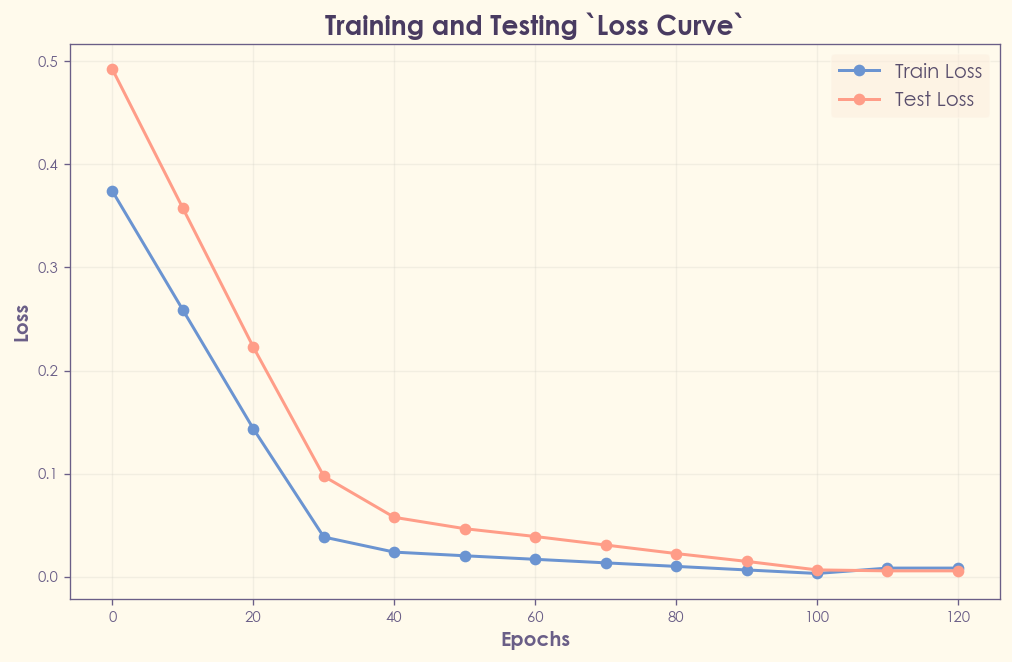

In [19]:
# Plotting the loss curves
plt.plot(epoch_count, train_loss_values, 'o-', label="Train Loss")
plt.plot(epoch_count, test_loss_values, 'o-', color='#FF9D88', label="Test Loss")
plt.title("Training and Testing `Loss Curve`")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(prop={"size": 12}, loc='upper right');

In [20]:
# Print the model current state after just 1 epoch
c,d = list(model_0.state_dict().values())
print(f"The params value we previously had in the tensor: ({a}, {b})")
print(f"After through `{epoch+1}` epochs our model's performance\t: ({c[0]:.4f}, {d[0]:.4f})")
print(f"And we need to adjust the performance to\t: ({weight:.4f}, {bias:.4f})")

The params value we previously had in the tensor: (0.3367, 0.1288)
After through `121` epochs our model's performance	: (0.5950, 0.3988)
And we need to adjust the performance to	: (0.6000, 0.4000)


#### Let's compare the predictions of the initial model and the new trained model
We will plot the predictions to compare here:

In [21]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

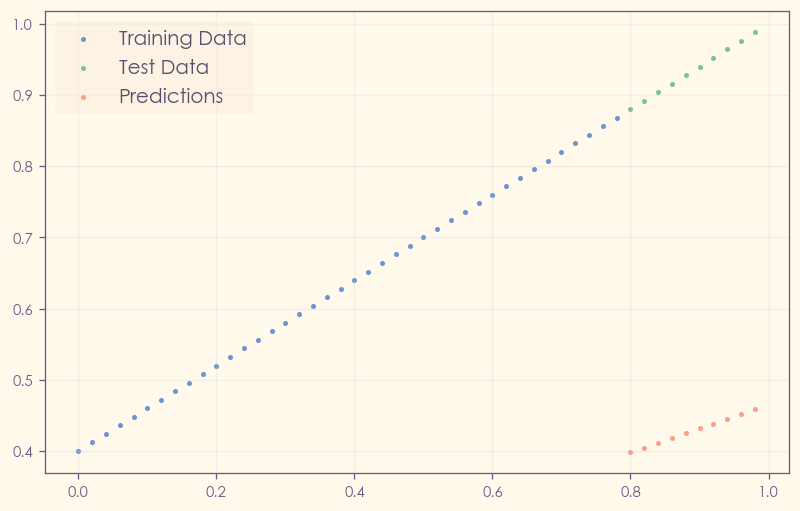

In [22]:
# Previous Initial Model Predictions
plot_pred(predictions=y_preds)

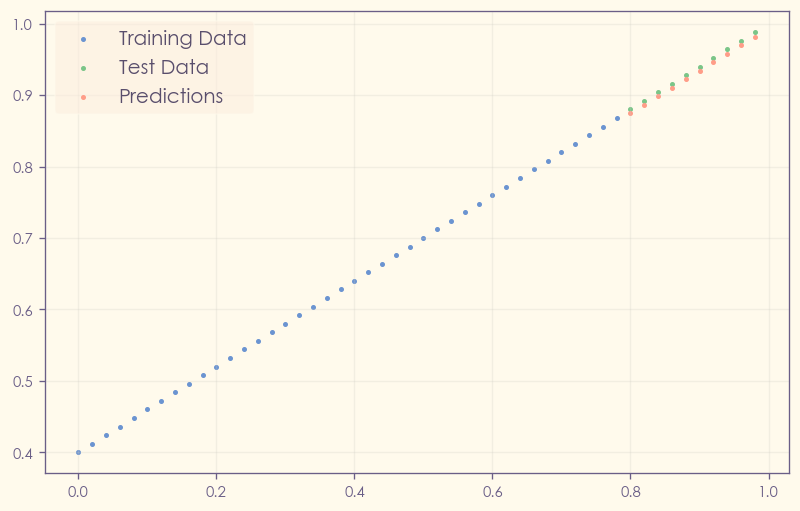

In [23]:
# New Model Predictions
plot_pred(predictions=y_preds_new.cpu())

### Saving and Loading a Model in PyTorch
There are three main methods for saving and loading our models:
1. `torch.save()` - save a PyTorch object in Python's `pickle` format
2. `torch.load()` - load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - load model's saved state dictionary

In [24]:
# Saving our PyTorch Model
from pathlib import Path

# Create Model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "pytorch_workflow_model01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Our Model's Path:\t{MODEL_SAVE_PATH}")

# Save the model with `state_dict()`
print(f"Saving Model to:\t{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)

Our Model's Path:	models\pytorch_workflow_model01.pth
Saving Model to:	models\pytorch_workflow_model01.pth


In [25]:
# Instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
# Load the saved state_dict
loaded_state_dict = torch.load(f=MODEL_SAVE_PATH, weights_only=True)

# Load the saved state_dict() of model_0 (this will update the new instance with updated parameters)
print(f"Previous Model state_dict():\n{model_0.state_dict()}")
print(f"Updated Saved Model state_dict():\n{loaded_model_0.state_dict()}")

Previous Model state_dict():
OrderedDict([('weights', tensor([0.5950], device='cuda:0')), ('bias', tensor([0.3988], device='cuda:0'))])
Updated Saved Model state_dict():
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


#### Checking if the saved model has the same predictive values

In [26]:
# Evaluate loaded_model_0
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test.cpu())
loaded_model_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [27]:
# Compare the predictions 
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])